In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nba-salary-and-statistics-201617/nba_salary.sqlite


In [17]:
import sqlite3
import seaborn as sns
import pdb
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import sklearn
import statsmodels.api as sm
import math

create connection to sql db

In [3]:
conn=sqlite3.connect("../input/nba-salary-and-statistics-201617/nba_salary.sqlite")
c = conn.cursor()

Find all table names from db

In [4]:
#find all tables names in the database
c.execute("SELECT name FROM sqlite_master WHERE type='table'")
for name in c.fetchall():
    print(name[0])

NBA_season1718_salary
Seasons_Stats


In [5]:
# print column names for salary
c.execute("SELECT * From NBA_season1718_salary")
# Using a list comprehension here
names = [description[0] for description in c.description]
print(names)

['X1', 'Player', 'Tm', 'season17_18']


In [6]:
# print column names for stats
c.execute("SELECT * From Seasons_Stats")
# Using a list comprehension here
names = [description[0] for description in c.description]
print(names)

['X1', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']


In [7]:
#find first 10 rows of Salaries table
c.execute("SELECT * From NBA_season1718_salary")
print(c.fetchmany(10))# first 10 rows

[(1.0, 'Stephen Curry', 'GSW', 34682550.0), (2.0, 'LeBron James', 'CLE', 33285709.0), (3.0, 'Paul Millsap', 'DEN', 31269231.0), (4.0, 'Gordon Hayward', 'BOS', 29727900.0), (5.0, 'Blake Griffin', 'DET', 29512900.0), (6.0, 'Kyle Lowry', 'TOR', 28703704.0), (7.0, 'Russell Westbrook', 'OKC', 28530608.0), (8.0, 'Mike Conley', 'MEM', 28530608.0), (9.0, 'James Harden', 'HOU', 28299399.0), (10.0, 'DeMar DeRozan', 'TOR', 27739975.0)]


In [8]:
# Print the first 10 teamIDs and average salaries from the salary table
c.execute('SELECT Tm, AVG(season17_18) From NBA_season1718_salary GROUP BY Tm')
for r in c.fetchall():
    print((r[0], r[1]))

('ATL', 3711770.2592592593)
('BOS', 6765291.882352941)
('BRK', 5335542.888888889)
('CHI', 3726043.4166666665)
('CHO', 8373440.285714285)
('CLE', 9806324.92857143)
('DAL', 3900970.9545454546)
('DEN', 6743068.6875)
('DET', 6004305.25)
('GSW', 8593427.8125)
('HOU', 5410185.5)
('IND', 4969989.0)
('LAC', 5945358.15)
('LAL', 4788884.090909091)
('MEM', 5505203.05)
('MIA', 7290145.777777778)
('MIL', 5485741.7272727275)
('MIN', 7341784.625)
('NOP', 5701217.666666667)
('NYK', 5135971.666666667)
('OKC', 8952937.066666666)
('ORL', 5701526.705882353)
('PHI', 5039713.9)
('PHO', 4515158.714285715)
('POR', 6268890.736842105)
('SAC', 4781376.4)
('SAS', 6832562.0)
('TOR', 6854635.05882353)
('UTA', 5373250.7)
('WAS', 6898880.111111111)


In [9]:
# find player with highest salary
c.execute('SELECT MAX(season17_18), Player From NBA_season1718_salary')
print(c.fetchall())

[(34682550.0, 'Stephen Curry')]


Shocker that Steph Curry has a high salary... 

In [12]:
# save salaries in pandas db to plot

df_salary = pd.read_sql("SELECT * From NBA_season1718_salary", conn)
df_salary.head()


,X1,Player,Tm,season17_18
0,1.0,Stephen Curry,GSW,34682550.0
1,2.0,LeBron James,CLE,33285709.0
2,3.0,Paul Millsap,DEN,31269231.0
3,4.0,Gordon Hayward,BOS,29727900.0
4,5.0,Blake Griffin,DET,29512900.0


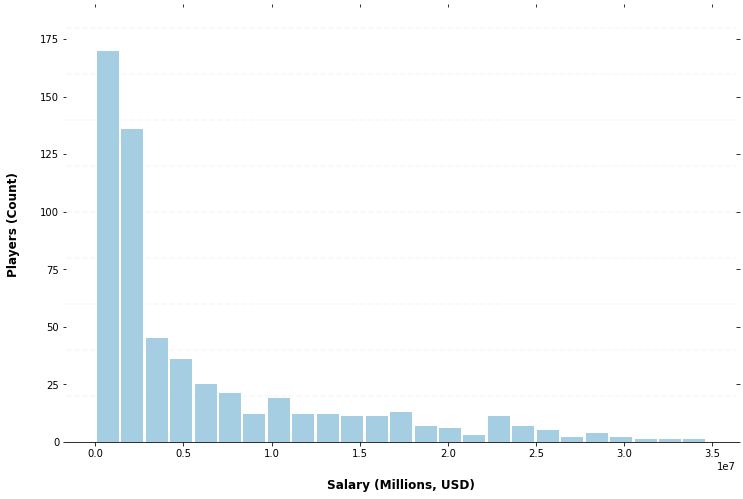

In [31]:
# Histogram of salary
pl_salary = df_salary.hist(column='season17_18', bins=25, grid=False, figsize=(12,8), color='#a6cee3', zorder=2, rwidth=0.9)

pl_salary = pl_salary[0]
for x in pl_salary:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Salary (Millions, USD)", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Players (Count)", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [20]:
# Salaries should be normalized... (heavy right skew)
df_salary['salary_norm'] = sklearn.preprocessing.scale(df_salary['season17_18'])


0    4.027825
1    3.832630
2    3.550846
3    3.335460
4    3.305416
Name: salary_norm, dtype: float64

In [30]:
# Check normalization
# Avg + Stdev
print(
    "Variance:", round(df_salary['salary_norm'].var(), 3),
    "Mean:", round(df_salary['salary_norm'].mean(), 3)
)

Variance: 1.002 Mean: 0.0


## Which characteristics most likely predict salary?

First, we join the salary and stat tables. 

In [33]:
# join salary and stat and save as pd df

# save stats to pd df for year 2017
df_stats = pd.read_sql("SELECT * From Seasons_Stats WHERE Year = 2017", conn)

# join df_stats w df_sal
df_nba = pd.merge(df_salary.drop_duplicates(), df_stats, on = 'Player', how = 'left') 
df_nba = df_nba.drop(columns=['X1_x', 'X1_y', 'Tm_y'])
df_nba = df_nba.rename(columns={"Tm_x": "Tm", "season17_18" : "Salary"})

df_nba.head()

,Player,Tm,Salary,salary_norm,Year,Pos,Age,G,GS,MP,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Stephen Curry,GSW,34682550.0,4.027825,2017.0,PG,28.0,79.0,NaN,2638.0,...,0.898,NaN,NaN,353.0,523.0,NaN,NaN,NaN,183.0,1999.0
1,LeBron James,CLE,33285709.0,3.832630,2017.0,SF,32.0,74.0,NaN,2794.0,...,0.674,NaN,NaN,640.0,646.0,NaN,NaN,NaN,134.0,1954.0
2,Paul Millsap,DEN,31269231.0,3.550846,2017.0,PF,31.0,69.0,NaN,2343.0,...,0.768,NaN,NaN,533.0,252.0,NaN,NaN,NaN,186.0,1246.0
3,Gordon Hayward,BOS,29727900.0,3.335460,2017.0,SF,26.0,73.0,NaN,2516.0,...,0.844,NaN,NaN,393.0,252.0,NaN,NaN,NaN,117.0,1601.0
4,Blake Griffin,DET,29512900.0,3.305416,2017.0,PF,27.0,61.0,NaN,2076.0,...,0.760,NaN,NaN,496.0,300.0,NaN,NaN,NaN,157.0,1316.0


In [ ]:
# since working data in pd df, close SQL conn
conn.close()

In [36]:
for col in df_nba.columns:
    print(col)

Player
Tm
Salary
salary_norm
Year
Pos
Age
G
GS
MP
PER
TS%
3PAr
FTr
ORB%
DRB%
TRB%
AST%
STL%
BLK%
TOV%
USG%
blanl
OWS
DWS
WS
WS/48
blank2
OBPM
DBPM
BPM
VORP
FG
FGA
FG%
3P
3PA
3P%
2P
2PA
2P%
eFG%
FT
FTA
FT%
ORB
DRB
TRB
AST
STL
BLK
TOV
PF
PTS


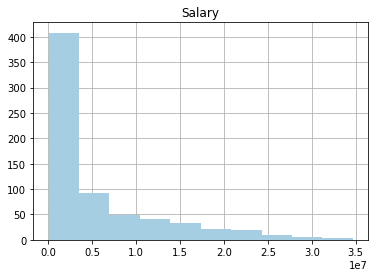

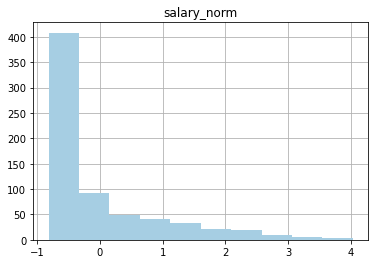

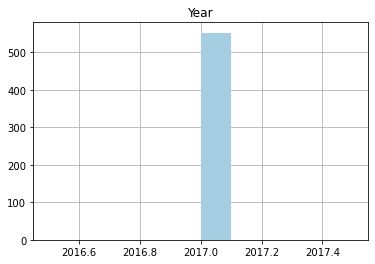

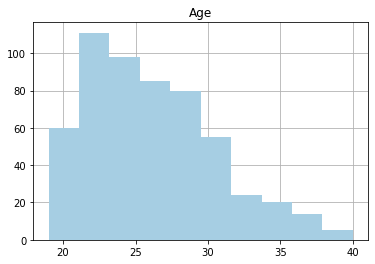

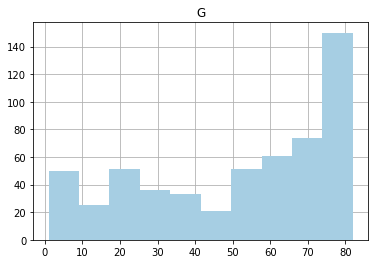

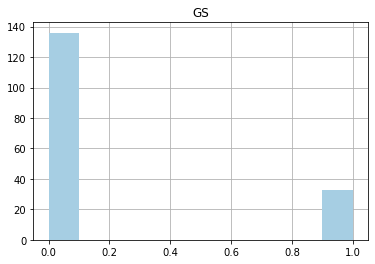

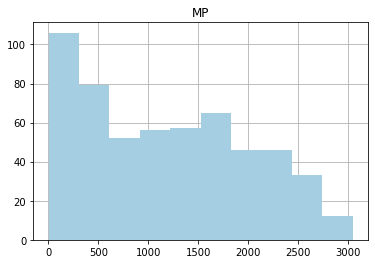

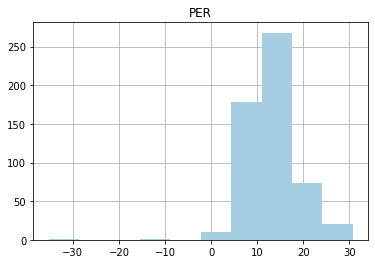

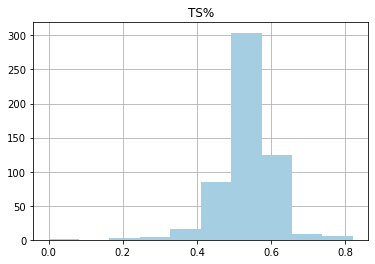

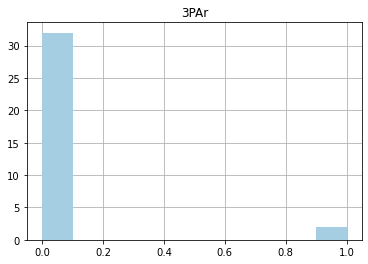

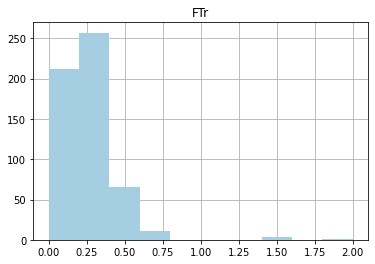

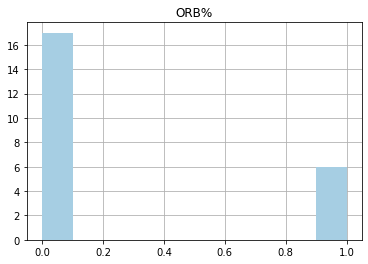

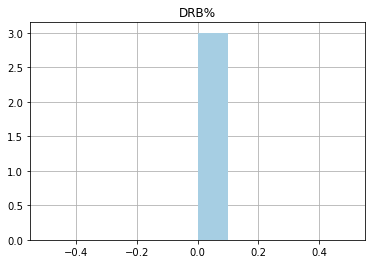

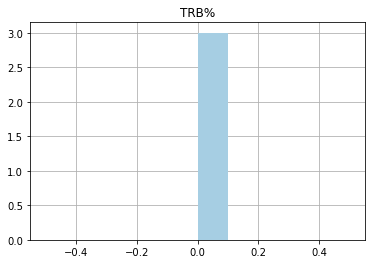

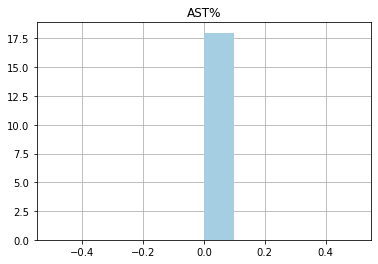

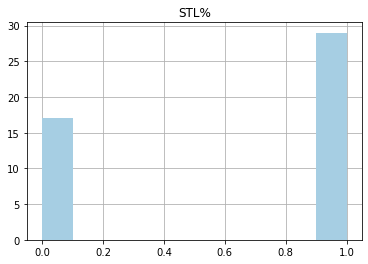

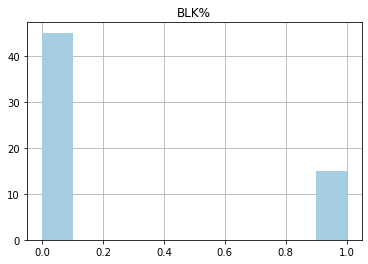

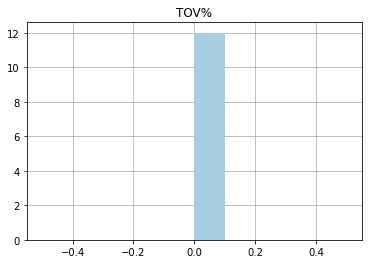

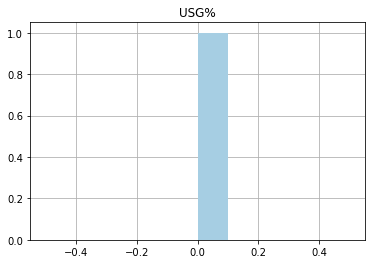

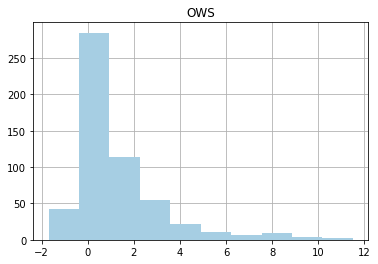

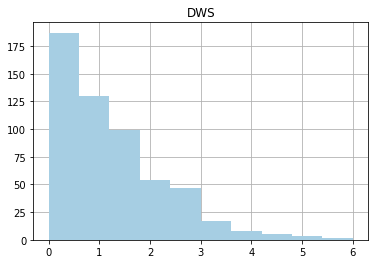

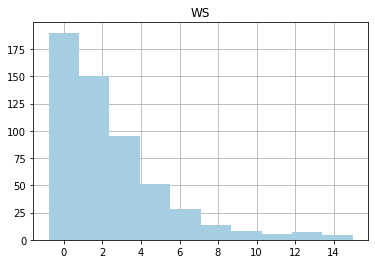

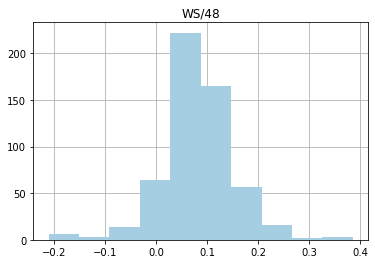

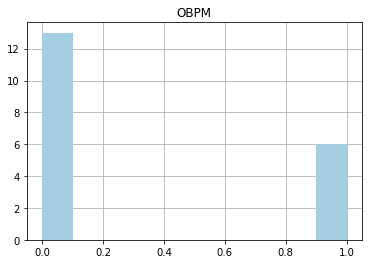

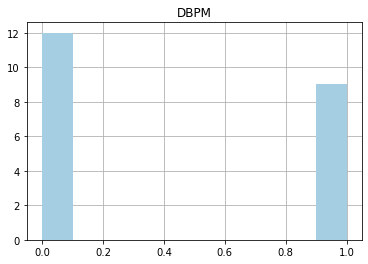

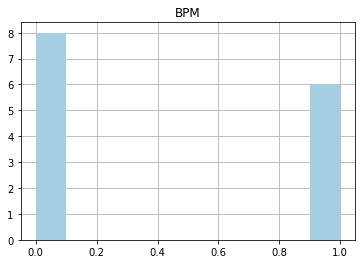

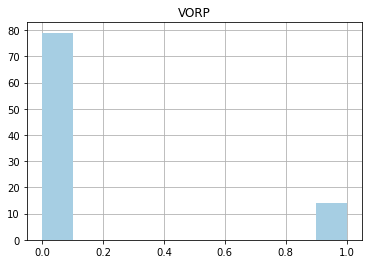

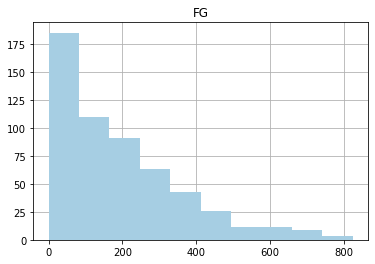

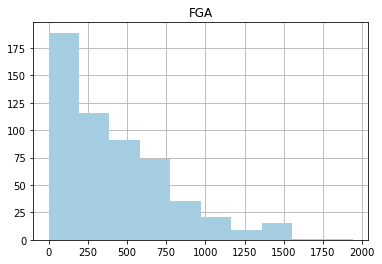

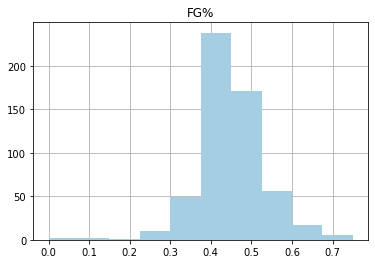

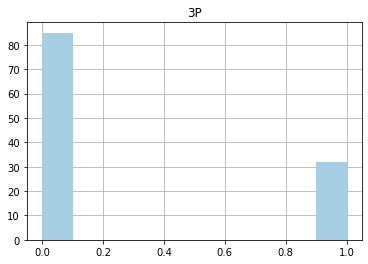

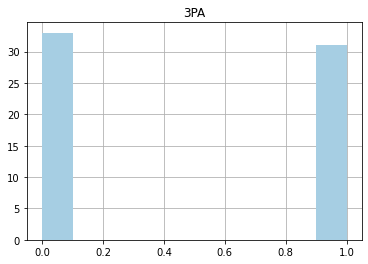

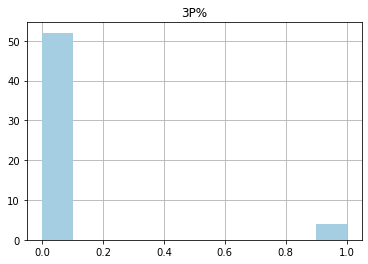

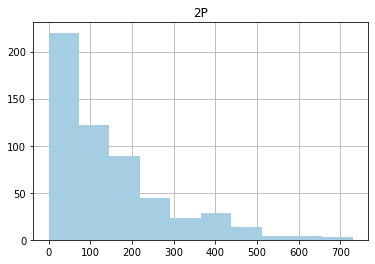

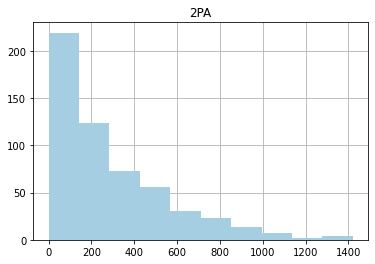

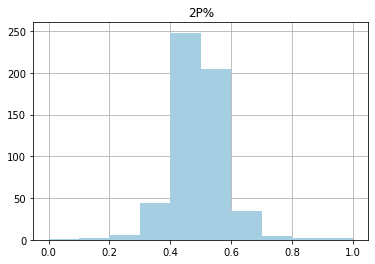

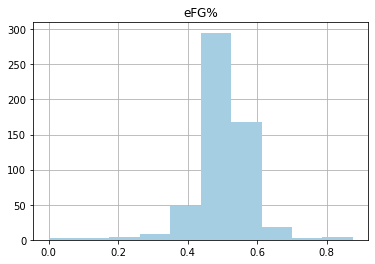

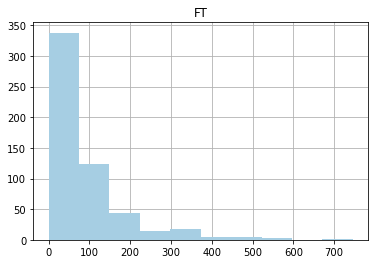

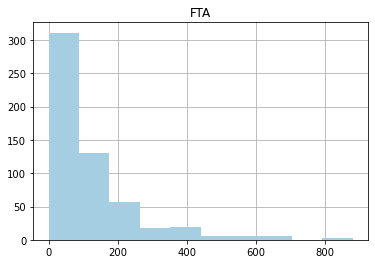

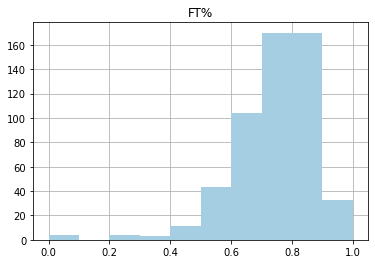

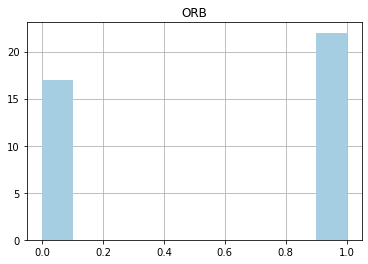

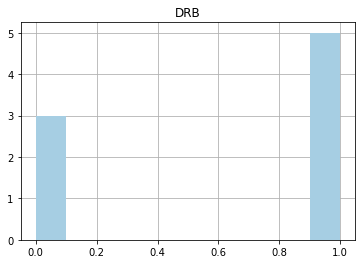

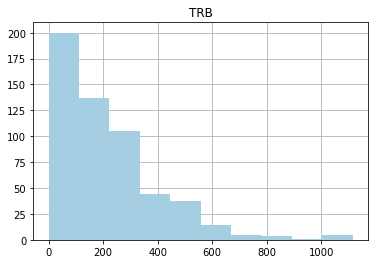

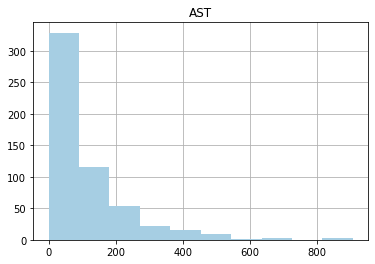

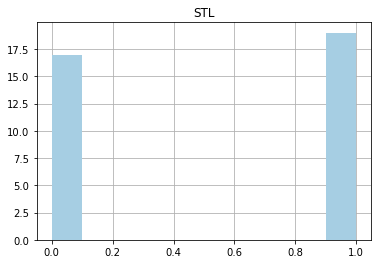

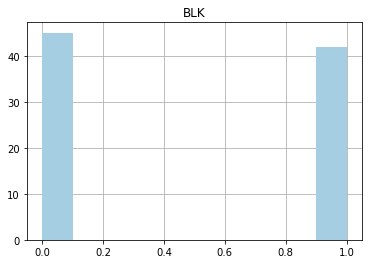

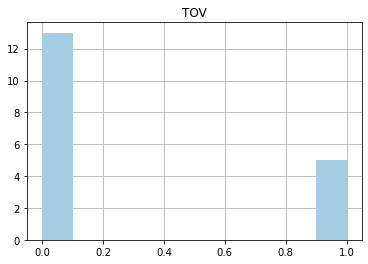

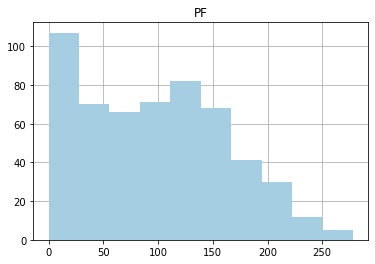

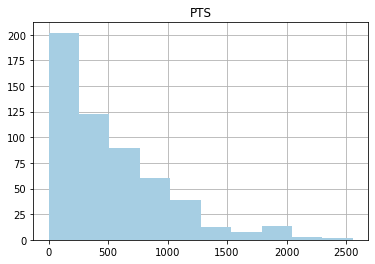

In [41]:
# Make a ~ton~ of histograms
for col in df_nba.columns:
    try:
        df_nba.hist(column=str(col), color='#a6cee3', zorder=2)
    except:
        pass

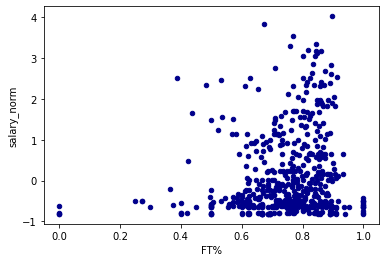

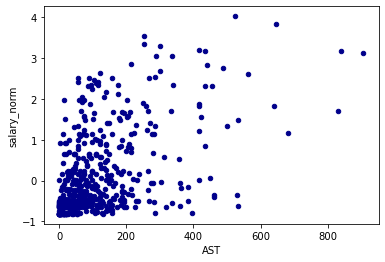

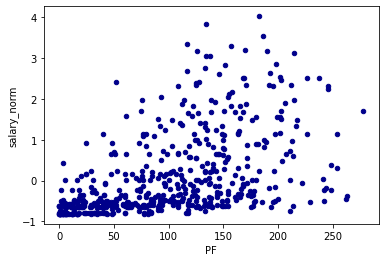

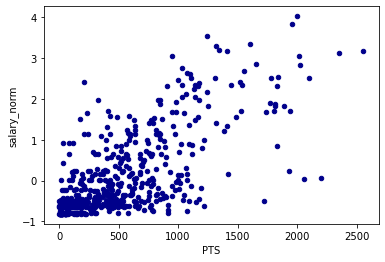

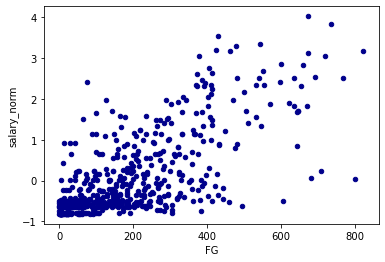

In [39]:
p1 = df_nba.plot.scatter(x='FT%', y='salary_norm', c='DarkBlue')
p2 = df_nba.plot.scatter(x='AST', y='salary_norm', c='DarkBlue')
p3 = df_nba.plot.scatter(x='PF', y='salary_norm', c='DarkBlue')
p4 = df_nba.plot.scatter(x='PTS', y='salary_norm', c='DarkBlue')
p5 = df_nba.plot.scatter(x='FG', y='salary_norm', c='DarkBlue')

ha.. everything is heteroskedastic... 

In [42]:
# check for NaNs by column
df_nba.isna().sum()

Player           0
Tm               0
Salary           0
salary_norm      0
Year           131
Pos            131
Age            131
G              131
GS             514
MP             131
PER            131
TS%            132
3PAr           649
FTr            132
ORB%           660
DRB%           680
TRB%           680
AST%           665
STL%           637
BLK%           623
TOV%           671
USG%           682
blanl          683
OWS            131
DWS            131
WS             131
WS/48          131
blank2         683
OBPM           664
DBPM           662
BPM            669
VORP           590
FG             131
FGA            131
FG%            132
3P             566
3PA            619
3P%            627
2P             131
2PA            131
2P%            134
eFG%           132
FT             131
FTA            131
FT%            141
ORB            644
DRB            675
TRB            131
AST            131
STL            647
BLK            596
TOV            665
PF          

In [ ]:
# Model

X = df_nba[['FT%','AST', 'PF', 'PTS']] # 4 covariates
X = sm.add_constant(X) # add constant
Y = df_nba['Salary']

# with statsmodels
model = sm.OLS(Y, X, missing='drop')
results = model.fit()


In [ ]:
results.summary()

lol big yikes.. lots of problems

Other thoughts...

- use full x-sec df and add year fixed effects
- add plot to see **distro** of salary overtime
- normalize salary /stdv - mean (someone else did % of cap?) 
- how to account for multicollinearity here? 